In [346]:
#################################
### IMPORT ######################
#################################

import csv
import string
from typing import NamedTuple, List
import numpy as np

# Importing standard Qiskit libraries
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

In [374]:
# a song with a name, artist, and bpm (beats per minute)
Song = NamedTuple('Song', [('name', str),
                           ('artist', str),
                           ('bpm', int)])

#################################
### DEFINITIONS #################
#################################

def songs(filename):
    """    
    reads information from the specified file and returns
    a list of songs
    """
    
    # keep list of songs
    los = []

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            s = Song(row[0], row[1], int(round(float(row[5]))))
            los.append(s)
    
    return los

def num_there(s):
    return any(i.isdigit() for i in s)

def wavelength(r):
    """
    returns the distance between two peaks, defined as the
    number of bars two peaks are from each other
    """
    
    # turn the dictionary into a list
    dictlist = []
    for key, value in r['measurement'].items():
        add = [key,value]
        dictlist.append(add)
    
    # find the top two peaks
    resultvals = r['measurement'].values()
    top = sorted(resultvals, reverse = True)[0]
    sec = sorted(resultvals, reverse = True)[1]
    
    # find the x values at those peaks
    xvals = []
    for i in np.arange(len(dictlist)):
        if (dictlist[i][1] == top or dictlist[i][1] == sec):
            xvals.append(int(dictlist[i][0], 2))

    return abs(xvals[0]-xvals[1])

def find_bpm(w):
    """
    find the beats per minute based on the
    given wavelength
    """
    
    # frequency is speed of sound/(wavelength times scaling factor)
    freq = 343/(w/1000)
    bpm = freq/60
    return bpm
    
def translate(value):
     """
    maps the value to a set range
    """

    leftMin = 89
    leftMax = 5716
    rightMin = 40
    rightMax = 250
    
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

def find_song(bpm, los):
    """
    return at most 5 songs in the given list of
    songs that are within 5 bpm of the given bpm.
    """
    songs = []
    for s in los:
        # add song to list if its bpm is within 5 of
        # the given bpm
        if (bpm-5) < s.bpm < (bpm+5):
            songs.append(s)
    if len(songs) <= 5:
        final = ["","","","",""]
        count = 0
        for s in songs:
            final[count] = s.name + ' by ' + s.artist
            count += 1
        return """
 Your songs: \n 1. {s1} \n 2. {s2}
 3. {s3} \n 4. {s4} \n 5. {s5}""".format(s1=final[0], 
                                                s2=final[1],
                                                s3=final[2],
                                                s4=final[3],
                                                s5=final[4])
    else:
        final = []
        for s in songs:
            final.append(s.name + ' by ' + s.artist)
        ind = np.random.randint(0, len(final))
        final = final[ind:ind+5]
        return """
 Your songs: \n 1. {s1} \n 2. {s2}
 3. {s3} \n 4. {s4} \n 5. {s5}""".format(s1=final[0], 
                                                s2=final[1],
                                                s3=final[2],
                                                s4=final[3],
                                                s5=final[4])

Type in a word! stone

 Your songs: 
 1. A Tisket A Tasket by Django Reinhardt;Quintette Du Hot Club de France 
 2. An Early Spring by Baby Dee
 3. Across Country by Ill Lit 
 4. Authentique by Lady Laistee 
 5. A Ras De Mí by Alado Sincera


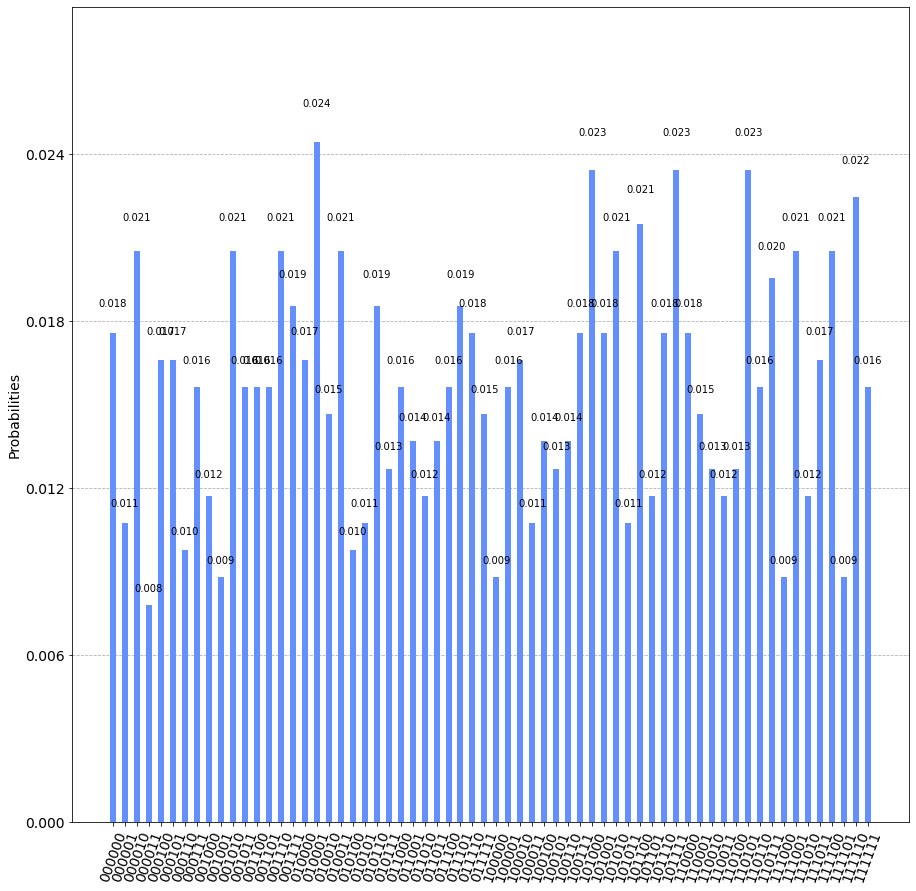

In [381]:
while True:
    Open = input('Type in a word! ').lower()
    if num_there(Open) == False:
        q = Open[0]
        break
    else:
        print("Oops!  That was not a string")

first = ['a','b']
second = ['c','d']
third = ['e','f']
fourth = ['g','h']
fifth = ['i','j']
sixth = ['k','l']
seventh = ['m','n']
eigth = ['o','p']
ninth = ['q','r']
tenth = ['s','t']
eleventh = ['u','v']
twelfth = ['w','x']
thirteenth = ['y','z']

if q in first:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    5 -3 -6 0
    -3 -2 -5 0
    1 2 -3 0
    -4 -5 3 0
    2 1 -5 0
    1 3 -2 0
    '''
    
elif q in second:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    -1 -3 -5 0
    6 1 -5 0
    -1 -4 5 0
    1 -6 2 0
    -5 -6 -3 0
    -3 6 -2 0
    '''
    
elif q in third:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    4 1 -2 0
    -3 -6 2 0
    3 1 4 0
    5 1 2 0
    -1 5 -3 0
    1 -2 -3 0
    '''
elif q in fourth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    4 3 -5 0
    4 -5 1 0
    1 -4 -6 0
    4 1 2 0
    3 2 5 0
    -4 2 3 0
    '''

elif q in fifth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    1 -2 -5 0
    1 -5 -6 0
    1 -2 -4 0
    -2 -3 -1 0
    2 -5 -4 0
    1 -5 -6 0
    '''
    
elif q in sixth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    1 2 4 0
    1 -2 6 0
    1 -3 -4 0
    -2 -6 -4 0
    2 -3 -5 0
    4 -5 -6 0
    '''

elif q in seventh:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    1 2 4 0
    -1 -2 -6 0
    1 -2 -3 0
    -2 -6 -4 0
    4 -3 -6 0
    3 5 -6 0
    '''

elif q in eigth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    -6 -2 -4 0
    1 -3 6 0
    1 2 -4 0
    -2 -3 1 0
    2 3 -4 0
    -3 -5 -6 0
    '''

elif q in ninth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    -1 -3 -4 0
    1 -2 -5 0
    5 -2 -4 0
    -2 -1 -4 0
    2 -3 -5 0
    3 5 -6 0
    '''

elif q in tenth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    6 -3 1 0
    -6 -5 1 0
    5 6 1 0
    6 -2 1 0
    3 4 -6 0
    2 -5 4 0
    '''

elif q in eleventh:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    2 -4 1 0
    -3 -6 -2 0
    -4 -3 1 0
    6 -4 -5 0
    1 3 -4 0
    -2 -4 -5 0
    '''
    
elif q in twelfth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    -5 2 4 0
    1 -5 2 0
    4 6 -5 0
    1 -6 5 0
    -5 2 -3 0
    3 -2 -5 0
    '''
    
elif q in thirteenth:
    input_3sat = '''
    c example DIMACS-CNF 3-SAT
    p cnf 6 6
    -3 1 4 0
    -6 1 4 0
    -4 5 6 0
    1 2 -3 0
    -5 -1 -4 0
    -2 -4 -5 0
    '''
    
oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)

wavelen = wavelength(result)
bpm = find_bpm(wavelen)
bpmtransform = translate(bpm)
songlist = songs('songs-starts-with-a.csv')
print((find_song(bpmtransform, songlist)))
plot_histogram(result['measurement'],figsize=(15,15))